In [1]:
import numpy as np
from scipy.integrate import trapezoid as trap
import matplotlib.pyplot as plt

In [33]:
data = np.loadtxt('stratification.dat')

In [34]:
data.shape

(256, 3)

(-2.827433, 0.314159)

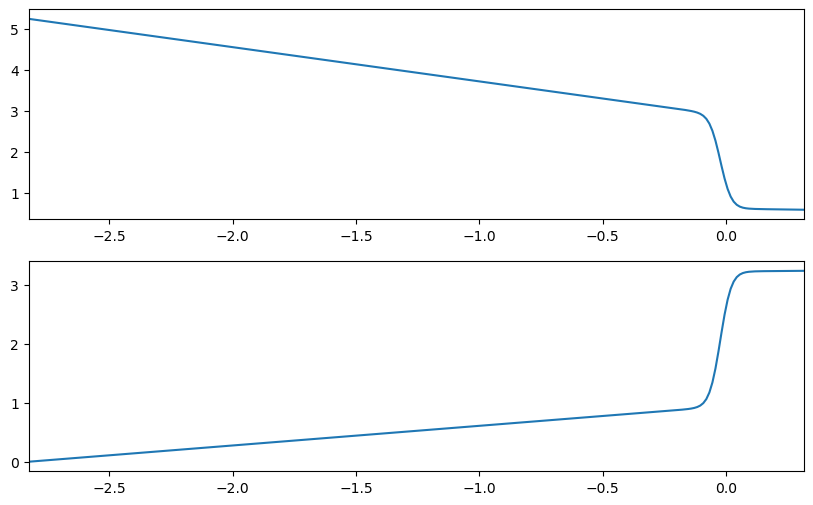

In [35]:
fig, axs = plt.subplots(2,1, figsize=(10,6))
axs[0].plot(data[:,0], data[:,1])
# axs[0].plot(z, lnrho)
axs[1].plot(data[:,0], data[:,2])

axs[0].set_xlim(data[0,0], data[-1,0])
axs[1].set_xlim(data[0,0], data[-1,0])

In [36]:
nz = 256 #128
cs2max = 10
depth = np.pi
g = 0.5

In [37]:
w = 0.04
z2 = np.pi/10 #np.pi/8
z1 = z2 - depth

In [38]:
gamma = 5/3
csbase = 1
z = np.linspace(z1,z2,nz)

In [39]:
z

array([-2.82743339, -2.81511342, -2.80279345, -2.79047347, -2.7781535 ,
       -2.76583353, -2.75351356, -2.74119359, -2.72887362, -2.71655365,
       -2.70423368, -2.69191371, -2.67959373, -2.66727376, -2.65495379,
       -2.64263382, -2.63031385, -2.61799388, -2.60567391, -2.59335394,
       -2.58103396, -2.56871399, -2.55639402, -2.54407405, -2.53175408,
       -2.51943411, -2.50711414, -2.49479417, -2.48247419, -2.47015422,
       -2.45783425, -2.44551428, -2.43319431, -2.42087434, -2.40855437,
       -2.3962344 , -2.38391443, -2.37159445, -2.35927448, -2.34695451,
       -2.33463454, -2.32231457, -2.3099946 , -2.29767463, -2.28535466,
       -2.27303468, -2.26071471, -2.24839474, -2.23607477, -2.2237548 ,
       -2.21143483, -2.19911486, -2.18679489, -2.17447492, -2.16215494,
       -2.14983497, -2.137515  , -2.12519503, -2.11287506, -2.10055509,
       -2.08823512, -2.07591515, -2.06359517, -2.0512752 , -2.03895523,
       -2.02663526, -2.01431529, -2.00199532, -1.98967535, -1.97

(-5.0, 5.0)

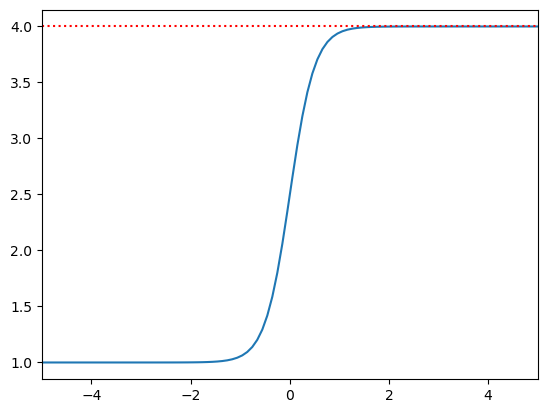

In [40]:
a = np.linspace(-5,5,100)
b = 1+0.5*(1+np.tanh(a/0.5))*(4-1)
plt.plot(a, b)
plt.axhline(y=4, ls=':', c='r')
plt.xlim(a[0], a[-1])

In [41]:
cs2 = csbase + 0.5*(1+np.tanh(z/w))*(cs2max-1)

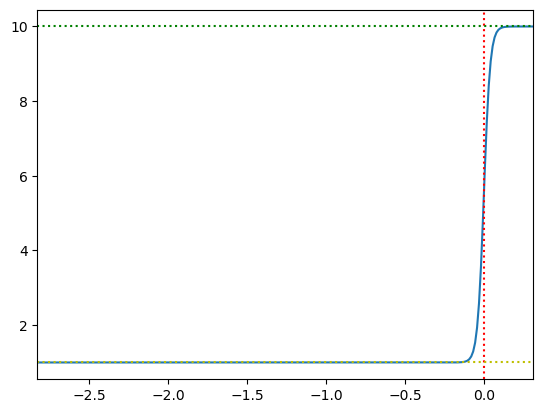

In [42]:
plt.plot(z, cs2)
plt.xlim(z[0], z[-1])
plt.axvline(x=0, ls=':', c='r')
plt.axhline(y=cs2max, ls=':', c='g')
plt.axhline(y=csbase, ls=':', c='y')
plt.show()

In [43]:
zz = np.zeros(np.size(z))

In [44]:
f = g/cs2

In [45]:
dz = z[1] - z[0]
dz

0.012319971190548173

In [46]:
for i in range(1, len(z)):
    # print(i)
    zz[i] = zz[i-1]+0.5*(f[i]+f[i-1])
zz = zz*dz

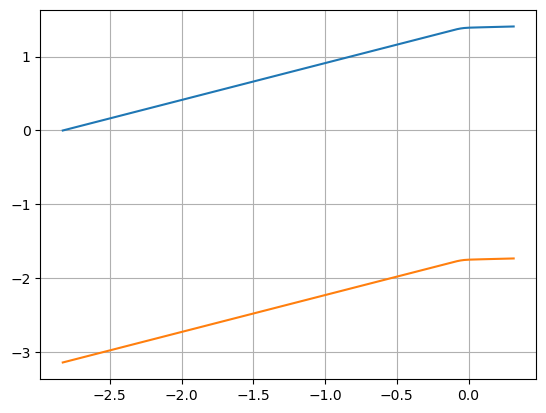

In [47]:
plt.plot(z, zz)
plt.plot(z, zz-depth)
plt.grid()
plt.show()

In [48]:
lncs2 = np.log(cs2)

In [49]:
lnrho = -gamma*(zz-depth)-lncs2

In [50]:
ss = (gamma-1)*zz+lncs2

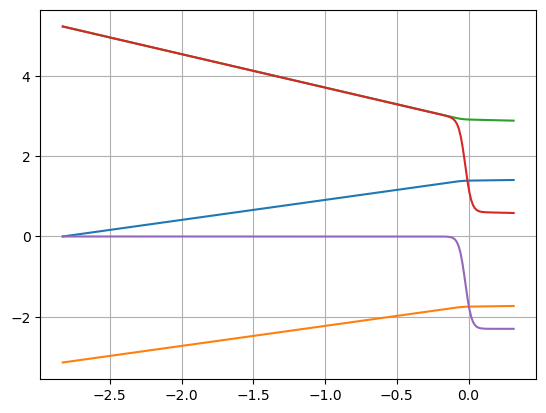

In [51]:
plt.plot(z, zz)
plt.plot(z, zz-depth)
plt.plot(z, -gamma*(zz-depth))
plt.plot(z, lnrho)
plt.plot(z, -lncs2)
plt.grid()
plt.show()

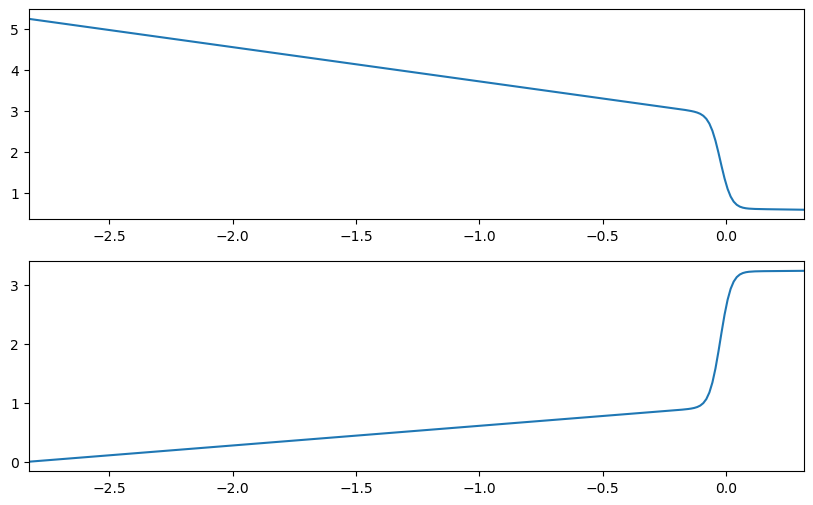

In [52]:
fig, axs = plt.subplots(2,1, figsize=(10,6))
axs[0].plot(z, lnrho)
axs[1].plot(z, ss)

axs[0].set_xlim(data[0,0], data[-1,0])
axs[1].set_xlim(data[0,0], data[-1,0])
# axs[0].set_yscale("log")
# axs[1].set_yscale("log")

plt.show()

In [53]:
arr = np.empty([nz,3])
arr[:,0] = z
arr[:,1] = lnrho
arr[:,2] = ss
arr

array([[-2.82743339e+00,  5.23598776e+00,  0.00000000e+00],
       [-2.81511342e+00,  5.22572111e+00,  4.10665706e-03],
       [-2.80279345e+00,  5.21545447e+00,  8.21331413e-03],
       [-2.79047347e+00,  5.20518783e+00,  1.23199712e-02],
       [-2.77815350e+00,  5.19492119e+00,  1.64266283e-02],
       [-2.76583353e+00,  5.18465454e+00,  2.05332853e-02],
       [-2.75351356e+00,  5.17438790e+00,  2.46399424e-02],
       [-2.74119359e+00,  5.16412126e+00,  2.87465994e-02],
       [-2.72887362e+00,  5.15385461e+00,  3.28532565e-02],
       [-2.71655365e+00,  5.14358797e+00,  3.69599136e-02],
       [-2.70423368e+00,  5.13332133e+00,  4.10665706e-02],
       [-2.69191371e+00,  5.12305469e+00,  4.51732277e-02],
       [-2.67959373e+00,  5.11278804e+00,  4.92798848e-02],
       [-2.66727376e+00,  5.10252140e+00,  5.33865418e-02],
       [-2.65495379e+00,  5.09225476e+00,  5.74931989e-02],
       [-2.64263382e+00,  5.08198812e+00,  6.15998560e-02],
       [-2.63031385e+00,  5.07172147e+00

In [54]:
np.savetxt('test.dat', arr, delimiter=' ')

In [55]:
# a = np.linspace(1,5,8)
# a, len(a)

In [56]:
# t = trap(a)
# t

In [57]:
# b = np.zeros(np.size(a))
# b

In [58]:
# for i in range(1, len(a)):
#     print(i)
#     b[i] = b[i-1]+0.5*(a[i]+a[i-1])
# b